<a href="https://colab.research.google.com/github/JD32919/EDA/blob/main/Redes_sociales_(BFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

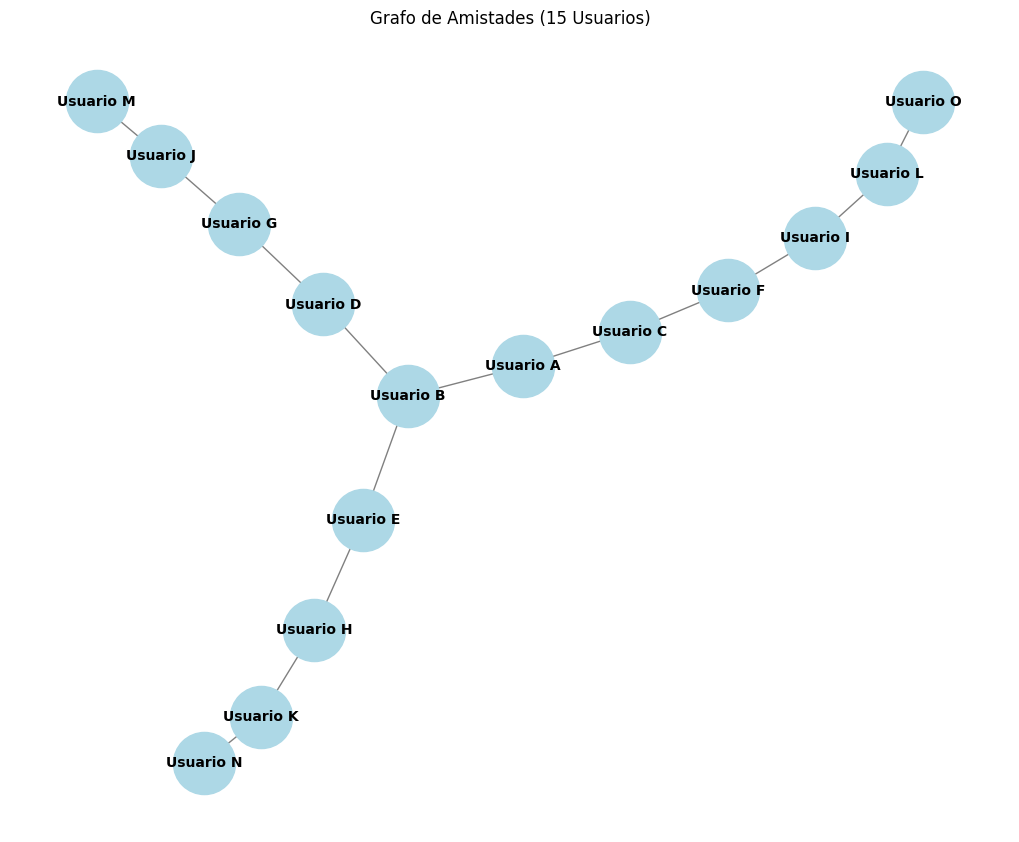

Amigos directos de Usuario A (Nivel 1): ['Usuario B', 'Usuario C']
Amigos de amigos de Usuario A (Nivel 2): ['Usuario D', 'Usuario E', 'Usuario F']


In [11]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Función para crear el grafo de usuarios y amistades con 15 nodos
def create_graph_15():
    G = nx.Graph()

    # Añadir nodos (usuarios)
    users = [f"Usuario {chr(i)}" for i in range(65, 80)]  # Usuarios de "Usuario A" a "Usuario O"
    G.add_nodes_from(users)

    # Añadir aristas (amistades)
    friendships = [("Usuario A", "Usuario B"), ("Usuario A", "Usuario C"),
                   ("Usuario B", "Usuario D"), ("Usuario B", "Usuario E"),
                   ("Usuario C", "Usuario F"), ("Usuario D", "Usuario G"),
                   ("Usuario E", "Usuario H"), ("Usuario F", "Usuario I"),
                   ("Usuario G", "Usuario J"), ("Usuario H", "Usuario K"),
                   ("Usuario I", "Usuario L"), ("Usuario J", "Usuario M"),
                   ("Usuario K", "Usuario N"), ("Usuario L", "Usuario O")]

    G.add_edges_from(friendships)

    return G

# Función para mostrar el grafo
def show_graph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Grafo de Amistades (15 Usuarios)")
    plt.show()

# Implementación de BFS para encontrar amigos directos y a dos niveles de distancia
def bfs_friends(graph, start_user, level=1):
    visited = {start_user}
    queue = deque([(start_user, 0)])  # (usuario, nivel)
    result = {1: [], 2: []}  # Guardar amigos por niveles

    while queue:
        current_user, current_level = queue.popleft()

        # Si alcanzamos el nivel deseado (1 o 2), almacenamos los amigos
        if current_level < level:
            for neighbor in graph.neighbors(current_user):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, current_level + 1))
                    if current_level + 1 == 1:
                        result[1].append(neighbor)  # Amigos directos
                    elif current_level + 1 == 2:
                        result[2].append(neighbor)  # Amigos de amigos

    return result

# Función principal para ejecutar el programa con 15 usuarios
def main_15():
    # Crear el grafo de 15 usuarios y mostrarlo
    G_15 = create_graph_15()
    show_graph(G_15)

    # Solicitar el usuario inicial y ejecutar BFS
    start_user = "Usuario A"
    friends = bfs_friends(G_15, start_user, level=2)

    # Mostrar los resultados
    print(f"Amigos directos de {start_user} (Nivel 1): {friends[1]}")
    print(f"Amigos de amigos de {start_user} (Nivel 2): {friends[2]}")

# Ejecutar el programa principal con 15 usuarios
main_15()
